# MÔN HỌC: KỸ NGHỆ TRI THỨC VÀ HỌC MÁY
-----
## Chương 2 - Thu thập và chuẩn bị dữ liệu(phần 02)
----
Giảng Viên: Đặng Văn Nam

Email: dangvannam@humg.edu.vn

# 1) Giới thiệu
---
**Pandas** là một thư viện mã nguồn mở được xây dựng dựa trên NumPy, sử dụng để thao tác và phân tích dữ liệu. Với Pandas chúng ta có thể:
Xử lý tập dữ liệu khác nhau về định dạng: chuỗi thời gian, bảng không đồng nhất, ma trận dữ liệu
* Import dữ liệu từ nhiều nguồn khác nhau như CSV, DB/SQL…
* Xử lý vô số phép toán cho tập dữ liệu: subsetting, slicing, filtering, merging, groupBy, re-ordering, and re-shaping,..
* Xử lý dữ liệu mất mát theo mong muốn.
* Xử lý, phân tích dữ liệu tốt như mô hình hoá và thống kê.
* Tích hợp tốt với các thư viện khác của python.

https://pandas.pydata.org/

# 2) Làm việc với các đối tượng trong Pandas
---
## 2.1) Series

**Series** là mảng một chiều (1D) giống như kiểu vector trong Numpy, hay như một cột của một bảng, nhưng nó bao gồm thêm một bảng đánh index.

In [1]:
#Khai báo sử dụng thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Tạo một đối tượng series
#index mặc định đánh số từ 0
data = pd.Series([2.8, 3, 4.44, 5])
data

0    2.80
1    3.00
2    4.44
3    5.00
dtype: float64

In [4]:
#Mỗi một đối tượng series bao gồm 2 thành phần
#1. Values
#2. index

print('Values:', data.values)
print('Indices:', data.index)

Values: [2.8  3.   4.44 5.  ]
Indices: RangeIndex(start=0, stop=4, step=1)


In [5]:
#Tạo một đối tượng series với index thiết lập
data = pd.Series([1.25, 2, 3.5, 4.75, 8.0],
                 index=['a', 'b', 'c', 'd','k'])
data

a    1.25
b    2.00
c    3.50
d    4.75
k    8.00
dtype: float64

In [6]:
print('Values:', data.values)
print('Indices:', data.index)

Values: [1.25 2.   3.5  4.75 8.  ]
Indices: Index(['a', 'b', 'c', 'd', 'k'], dtype='object')


In [7]:
#Truy cập tới một phần tử trong series thông qua index hoặc thứ tự
print('Phần tử có index = b:', data['b'])
print('Phần tử ở vị trí 1  :', data[1])

Phần tử có index = b: 2.0
Phần tử ở vị trí 1  : 2.0


In [8]:
#Tạo đối tượng series từ một biến kiểu Dictionary
#Chỉ số được tự động sắp xếp.
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict,name='Population_USA')
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: Population_USA, dtype: int64

In [9]:
#View tên của series
population.name

'Population_USA'

In [10]:
population['Florida']

19552860

In [11]:
#Chuyển đổi từ dữ liệu vector sang series
a_vector = np.array([8,12,9,0,7,11])
a_series = pd.Series(a_vector,dtype='float')
a_series


0     8.0
1    12.0
2     9.0
3     0.0
4     7.0
5    11.0
dtype: float64

## 1.2) DataFrame
---

In [12]:
#Tạo DataFrame từ các Series
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict, name='Area_USA')
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: Area_USA, dtype: int64

In [13]:
data_usa = pd.DataFrame({'population':population,
                         'area':area})
data_usa

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [14]:
#Tương tự như series, DataFrame cũng có thuộc tính values và index
df_values = data_usa.values
df_index = data_usa.index
print('Values of DataFrame:\n',df_values)
print('Index of DataFrame:\n',df_index)

Values of DataFrame:
 [[38332521   423967]
 [26448193   695662]
 [19651127   141297]
 [19552860   170312]
 [12882135   149995]]
Index of DataFrame:
 Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')


In [15]:
#Tạo một DataFrame từ một biến Dict
#Chỉ số được tạo mặc định từ 0
data_dict = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]}

purchases = pd.DataFrame(data_dict)
purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


In [16]:
#Tạo DataFrame với index thiết lập
purchases = pd.DataFrame(data_dict, 
                         index=['June', 'Robert', 'Lily', 'David'])
purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


# 3) Quan sát và truy suất dữ liệu từ DataFrame
---
## 3.1) Quan sát dữ liệu

In [17]:
#Đọc dữ liệu mẫu được lưu trữ trong file csv
path='Data_Excercise\csv_Data_Loan.csv'
df_loan=pd.read_csv(path)
df_loan

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163982,15000,60 months,12.39,3.0,MORTGAGE,45000.0,credit_card,OK,31.44,4.0,75.8,34.0,0,20.0,not verified
163983,20000,36 months,14.99,10.0,OWN,80000.0,home_improvement,VA,23.65,0.0,68.8,18.0,0,22.0,verified
163984,12825,36 months,17.14,6.0,MORTGAGE,38000.0,debt_consolidation,TX,9.03,0.0,70.7,24.0,0,9.0,not verified
163985,27650,60 months,21.99,0.0,RENT,60000.0,credit_card,NY,10.10,1.0,61.2,20.0,0,6.0,verified


In [18]:
#Quan sát dữ liệu biến DataFrame
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   term                   163987 non-null  object 
 2   int_rate               163987 non-null  float64
 3   emp_length             158183 non-null  float64
 4   home_ownership         163987 non-null  object 
 5   annual_inc             163983 non-null  float64
 6   purpose                163987 non-null  object 
 7   addr_state             163987 non-null  object 
 8   dti                    163987 non-null  float64
 9   delinq_2yrs            163958 non-null  float64
 10  revol_util             163794 non-null  float64
 11  total_acc              163958 non-null  float64
 12  bad_loan               163987 non-null  int64  
 13  longest_credit_length  163958 non-null  float64
 14  verification_status    163987 non-nu

In [19]:
#Hiển thị 10 dòng đầu tiên
df_loan.head(10)

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified
5,3000,36 months,18.64,9.0,RENT,48000.0,car,CA,5.35,0.0,87.5,4.0,0,4.0,verified
6,5600,60 months,21.28,4.0,OWN,40000.0,small_business,CA,5.55,0.0,32.6,13.0,1,7.0,verified
7,5375,60 months,12.69,0.0,RENT,15000.0,other,TX,18.08,0.0,36.5,3.0,1,7.0,verified
8,6500,60 months,14.65,5.0,OWN,72000.0,debt_consolidation,AZ,16.12,0.0,20.6,23.0,0,13.0,not verified
9,12000,36 months,12.69,10.0,OWN,75000.0,debt_consolidation,CA,10.78,0.0,67.1,34.0,0,22.0,verified


In [20]:
#Hiển thị 5 dòng cuối cùng của biến df_loan
df_loan.tail()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
163982,15000,60 months,12.39,3.0,MORTGAGE,45000.0,credit_card,OK,31.44,4.0,75.8,34.0,0,20.0,not verified
163983,20000,36 months,14.99,10.0,OWN,80000.0,home_improvement,VA,23.65,0.0,68.8,18.0,0,22.0,verified
163984,12825,36 months,17.14,6.0,MORTGAGE,38000.0,debt_consolidation,TX,9.03,0.0,70.7,24.0,0,9.0,not verified
163985,27650,60 months,21.99,0.0,RENT,60000.0,credit_card,NY,10.10,1.0,61.2,20.0,0,6.0,verified
163986,17000,60 months,15.99,10.0,MORTGAGE,63078.0,debt_consolidation,PA,31.70,0.0,54.0,28.0,0,16.0,verified


In [21]:
#Hiển thị kích thước df_loan (rows x columns)
df_loan.shape

(163987, 15)

In [22]:
#Danh sách tên các columns trong df
df_loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'home_ownership',
       'annual_inc', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'revol_util', 'total_acc', 'bad_loan', 'longest_credit_length',
       'verification_status'],
      dtype='object')

In [23]:
#Kiếm tra giá trị null trong Df
df_loan.isnull()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163982,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
163983,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
163984,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
163985,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
#Thống kê số lượng null theo cột
df_loan.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
emp_length               5804
home_ownership              0
annual_inc                  4
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                29
revol_util                193
total_acc                  29
bad_loan                    0
longest_credit_length      29
verification_status         0
dtype: int64

In [25]:
#Cho biết số dòng dữ liệu không null
df_loan.count()

loan_amnt                163987
term                     163987
int_rate                 163987
emp_length               158183
home_ownership           163987
annual_inc               163983
purpose                  163987
addr_state               163987
dti                      163987
delinq_2yrs              163958
revol_util               163794
total_acc                163958
bad_loan                 163987
longest_credit_length    163958
verification_status      163987
dtype: int64

In [26]:
#Số phần tử trong df (= rows x columns)
df_loan.size

2459805

In [27]:
#Kiểu dữ liệu của từng columns trong df
df_loan.dtypes

loan_amnt                  int64
term                      object
int_rate                 float64
emp_length               float64
home_ownership            object
annual_inc               float64
purpose                   object
addr_state                object
dti                      float64
delinq_2yrs              float64
revol_util               float64
total_acc                float64
bad_loan                   int64
longest_credit_length    float64
verification_status       object
dtype: object

In [28]:
#Quan sát một số đặc trưng thống kê của df
#Mặc định thống kê các cột dữ liệu số
df_loan.describe()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length
count,163987.000000,163987.000000,158183.000000,1.639830e+05,163987.000000,163958.000000,163794.000000,163958.000000,163987.000000,163958.000000
mean,13074.169141,13.715904,5.684353,7.191567e+04,15.881530,0.227357,54.079173,24.579734,0.183039,14.854274
std,7993.556189,4.391940,3.610664,5.907092e+04,7.587668,0.694168,25.285367,11.685190,0.386700,6.947733
min,500.000000,5.420000,0.000000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,7000.000000,10.650000,2.000000,4.500000e+04,10.230000,0.000000,35.600000,16.000000,0.000000,10.000000
50%,11325.000000,13.490000,6.000000,6.100000e+04,15.620000,0.000000,55.800000,23.000000,0.000000,14.000000
75%,18000.000000,16.320000,10.000000,8.500000e+04,21.260000,0.000000,74.200000,31.000000,0.000000,18.000000
max,35000.000000,26.060000,10.000000,7.141778e+06,39.990000,29.000000,150.700000,118.000000,1.000000,65.000000


In [29]:
#Quan sát một số đặc trưng thống kê của df
#Thống kê các cột dữ liệu Object
df_loan.describe(include='O')

,term,home_ownership,purpose,addr_state,verification_status
count,163987,163987,163987,163987,163987
unique,2,6,14,50,2
top,36 months,MORTGAGE,debt_consolidation,CA,verified
freq,129950,79714,93261,28702,104832


In [30]:
#Thống kê tất cả các cột dữ liệu ko phân biệt số, object
df_loan.describe(include='all')

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
count,163987.000000,163987,163987.000000,158183.000000,163987,1.639830e+05,163987,163987,163987.000000,163958.000000,163794.000000,163958.000000,163987.000000,163958.000000,163987
unique,NaN,2,NaN,NaN,6,NaN,14,50,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,36 months,NaN,NaN,MORTGAGE,NaN,debt_consolidation,CA,NaN,NaN,NaN,NaN,NaN,NaN,verified
freq,NaN,129950,NaN,NaN,79714,NaN,93261,28702,NaN,NaN,NaN,NaN,NaN,NaN,104832
mean,13074.169141,NaN,13.715904,5.684353,NaN,7.191567e+04,NaN,NaN,15.881530,0.227357,54.079173,24.579734,0.183039,14.854274,NaN
std,7993.556189,NaN,4.391940,3.610664,NaN,5.907092e+04,NaN,NaN,7.587668,0.694168,25.285367,11.685190,0.386700,6.947733,NaN
min,500.000000,NaN,5.420000,0.000000,NaN,1.896000e+03,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN
25%,7000.000000,NaN,10.650000,2.000000,NaN,4.500000e+04,NaN,NaN,10.230000,0.000000,35.600000,16.000000,0.000000,10.000000,NaN
50%,11325.000000,NaN,13.490000,6.000000,NaN,6.100000e+04,NaN,NaN,15.620000,0.000000,55.800000,23.000000,0.000000,14.000000,NaN
75%,18000.000000,NaN,16.320000,10.000000,NaN,8.500000e+04,NaN,NaN,21.260000,0.000000,74.200000,31.000000,0.000000,18.000000,NaN


In [31]:
#Quan sát đặc trưng thống kê theo từng cột
#Dữ liệu số
df_loan[['loan_amnt']].describe()

,loan_amnt
count,163987.000000
mean,13074.169141
std,7993.556189
min,500.000000
25%,7000.000000
50%,11325.000000
75%,18000.000000
max,35000.000000


In [32]:
#Quan sát đặc trưng thống kê theo từng cột
#Dữ liệu Object
df_loan[['term']].describe()

,term
count,163987
unique,2
top,36 months
freq,129950


## 3.2) Truy xuất dữ liệu trong DataFrame
---

In [33]:
#Truy xuất dữ liệu theo cột
#Lấy dữ liệu của một cột
df_state = df_loan[['addr_state']]
df_state.head()

,addr_state
0,AZ
1,GA
2,IL
3,CA
4,AZ


In [34]:
#Truy xuất dữ liệu theo cột
#Chỉ lấy dữ liệu của 3 cột: loan_amnt, int_rate, purpose
df_loan1 = df_loan[['loan_amnt','int_rate','purpose']]
df_loan1.head()

,loan_amnt,int_rate,purpose
0,5000,10.65,credit_card
1,2500,15.27,car
2,2400,15.96,small_business
3,10000,13.49,other
4,5000,7.90,wedding


In [35]:
df_bank = df_loan[['loan_amnt','term','int_rate','home_ownership','purpose','addr_state','bad_loan']]
df_bank.head()

,loan_amnt,term,int_rate,home_ownership,purpose,addr_state,bad_loan
0,5000,36 months,10.65,RENT,credit_card,AZ,0
1,2500,60 months,15.27,RENT,car,GA,1
2,2400,36 months,15.96,RENT,small_business,IL,0
3,10000,36 months,13.49,RENT,other,CA,0
4,5000,36 months,7.90,RENT,wedding,AZ,0


#### df.iloc[[index_row],[index_col]]: Truy cập tới dữ liệu của hàng và cột qua chỉ số index_row, index_col (tương tự như với Numpy)

In [36]:
df_bank.to_csv('Data_bank.csv',index = None)

In [37]:
#Sử dụng .iloc truy xuất dữ liệu như với Numpy
#Truy xuất 10 dòng dữ liệu từ [10 --> 20) tất cả các cột
df_loan.iloc[10:20,:] #[row:row,col:col]

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
10,9000,36 months,13.49,0.0,RENT,30000.00,debt_consolidation,VA,10.08,0.0,91.70,9.0,1,7.0,verified
11,3000,36 months,9.91,3.0,RENT,15000.00,credit_card,IL,12.56,0.0,43.10,11.0,0,8.0,verified
12,10000,36 months,10.65,3.0,RENT,100000.00,other,CA,7.06,0.0,55.50,29.0,1,20.0,verified
13,1000,36 months,16.29,0.0,RENT,28000.00,debt_consolidation,MO,20.31,0.0,81.50,23.0,0,4.0,not verified
14,10000,36 months,15.27,4.0,RENT,42000.00,home_improvement,CA,18.60,0.0,70.20,28.0,0,13.0,not verified
15,3600,36 months,6.03,10.0,MORTGAGE,110000.00,major_purchase,CT,10.52,0.0,16.00,42.0,0,18.0,not verified
16,6000,36 months,11.71,1.0,MORTGAGE,84000.00,medical,UT,18.44,2.0,37.73,14.0,0,8.0,verified
17,9200,36 months,6.03,6.0,RENT,77385.19,debt_consolidation,CA,9.86,0.0,23.10,28.0,0,10.0,not verified
18,21000,36 months,12.42,10.0,RENT,105000.00,debt_consolidation,FL,13.22,0.0,90.30,38.0,1,28.0,verified
19,10000,36 months,11.71,10.0,OWN,50000.00,credit_card,TX,11.18,0.0,82.40,21.0,0,26.0,verified


In [38]:
#Truy xuất 100 dòng dữ liệu đầu tiên,
#của các cột có index 0, 4, 6, 7
df_loan.iloc[:100,[0,4,6,7]]

,loan_amnt,home_ownership,purpose,addr_state
0,5000,RENT,credit_card,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
...,...,...,...,...
95,24000,RENT,debt_consolidation,CA
96,6000,RENT,debt_consolidation,CA
97,6000,RENT,debt_consolidation,AZ
98,2100,MORTGAGE,vacation,LA


In [39]:
#Truy cập dòng dữ liệu 10, cột 7
df_loan.iloc[10,7]

'VA'

In [40]:
#Truy cập dòng dữ liệu 10, dòng 7
#Cột dữ liệu 0, 1, 5
df_loan.iloc[[10,7],[0,1,5]]

,loan_amnt,term,annual_inc
10,9000,36 months,30000.0
7,5375,60 months,15000.0


#### df.loc[[index_row],[name_col]]: Truy cập tới dữ liệu của hàng và cột qua chỉ số index_row, tên cột name_col

In [41]:
#Truy cập từ dòng có index 20 đến dòng 25 của df
#chỉ lấy dữ liệu 4 cột: loan_amnt, home_ownership, purpose, addr_state
df_loan.loc[20:25,['loan_amnt','home_ownership','purpose','addr_state']]

,loan_amnt,home_ownership,purpose,addr_state
20,10000,RENT,debt_consolidation,CA
21,6000,RENT,major_purchase,CA
22,15000,MORTGAGE,credit_card,IL
23,15000,RENT,debt_consolidation,NY
24,5000,RENT,other,PA
25,4000,MORTGAGE,debt_consolidation,FL


# 4) Replacing Values and Renamde Columns
---
## 4.1) Replacing values

In [42]:
#tách lấy dataframe để thực hiện replacing values
df_new = df_loan.loc[:10,['loan_amnt',
                          'home_ownership',
                          'purpose',
                          'addr_state']]
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,5000,RENT,credit_card,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
5,3000,RENT,car,CA
6,5600,OWN,small_business,CA
7,5375,RENT,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [43]:
#Thay thế giá trị purpose: credit_card--> wedding
#của index đầu tiên
df_new.loc[0,'purpose'] = 'wedding'
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,5000,RENT,wedding,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
5,3000,RENT,car,CA
6,5600,OWN,small_business,CA
7,5375,RENT,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [44]:
#Thay thế giá trị thuộc tính loan_amnt: 2400 --> 8800
#của index = 2
df_new.iloc[2,0] = 8800
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,5000,RENT,wedding,AZ
1,2500,RENT,car,GA
2,8800,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
5,3000,RENT,car,CA
6,5600,OWN,small_business,CA
7,5375,RENT,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [45]:
#Thay thế nhiều giá trị trong DataFrame
#RENT --> MORTGAGE
#car --> small_business
df_new.replace({'RENT':'MORTGAGE',
                'car':'small_business'})

,loan_amnt,home_ownership,purpose,addr_state
0,5000,MORTGAGE,wedding,AZ
1,2500,MORTGAGE,small_business,GA
2,8800,MORTGAGE,small_business,IL
3,10000,MORTGAGE,other,CA
4,5000,MORTGAGE,wedding,AZ
5,3000,MORTGAGE,small_business,CA
6,5600,OWN,small_business,CA
7,5375,MORTGAGE,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [46]:
#Khi muốn thay đổi áp dụng lên DataFrame hiện tại
#Thiết lập tham số inplace=True
df_new.replace({'RENT':'MORTGAGE',
                'car':'small_business'}, inplace=True)
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,5000,MORTGAGE,wedding,AZ
1,2500,MORTGAGE,small_business,GA
2,8800,MORTGAGE,small_business,IL
3,10000,MORTGAGE,other,CA
4,5000,MORTGAGE,wedding,AZ
5,3000,MORTGAGE,small_business,CA
6,5600,OWN,small_business,CA
7,5375,MORTGAGE,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [47]:
#Thay thế tên viết tắt bằng tên đầy đủ.
state_name={'AZ':'Arizona',
            'GA':'Georgia',
            'IL':'Illinois',
            'CA':'California',
            'TX':'Texas',
            'VA':'Virgrinia'}
#Trong cột addr_state
df_new['addr_state'].replace(state_name,inplace=True)
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,5000,MORTGAGE,wedding,Arizona
1,2500,MORTGAGE,small_business,Georgia
2,8800,MORTGAGE,small_business,Illinois
3,10000,MORTGAGE,other,California
4,5000,MORTGAGE,wedding,Arizona
5,3000,MORTGAGE,small_business,California
6,5600,OWN,small_business,California
7,5375,MORTGAGE,other,Texas
8,6500,OWN,debt_consolidation,Arizona
9,12000,OWN,debt_consolidation,California


## 4.2) Thay đổi tên cột trong DataFrame
---

In [48]:
df_new = df_loan[['loan_amnt','home_ownership','purpose','addr_state']].copy()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   loan_amnt       163987 non-null  int64 
 1   home_ownership  163987 non-null  object
 2   purpose         163987 non-null  object
 3   addr_state      163987 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


In [49]:
#Đổi tên cột
t = df_new.rename(columns={'loan_amnt':'Số tiền vay',
                       'home_ownership':'Tình trạng nhà ở',
                       'purpose': ' Mục đích vay tiền',
                       'addr_state':'Địa chỉ'})
t.head()

,Số tiền vay,Tình trạng nhà ở,Mục đích vay tiền,Địa chỉ
0,5000,RENT,credit_card,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ


In [50]:
#Muốn áp dụng thay đổi vào trực tiếp biến df, sử dụng inplace=True
df_new.rename(columns={'loan_amnt':'Số tiền vay',
                       'home_ownership':'Tình trạng nhà ở',
                       'purpose': ' Mục đích vay tiền',
                       'addr_state':'Địa chỉ'}, inplace=True)
df_new.head()

,Số tiền vay,Tình trạng nhà ở,Mục đích vay tiền,Địa chỉ
0,5000,RENT,credit_card,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ


In [ ]:
#Đổi tên cột sang viết hoa
df_new.rename(str.upper, axis='columns')

In [ ]:
df_new

## Thực hành 1
---
**Yêu cầu 1.1:**
1. Đọc dữ liệu từ file .csv vào biến kiểu dataframe: df_patient với cột feature_1 là cột chỉ số (index_col)
2. Hiển thị thông tin tổng quan của tập dữ liệu
3. Hiển thị thông tin của 10 bệnh nhân đầu tiên và 5 bệnh nhân cuối cùng của tập dữ liệu.
4. Đặt lại tên các cột dữ liệu trong Dataframe: 
    * Feature_1 --> Age
    * Feature_2 --> Gender
    * Feature_3 --> Type
    * Feature_4 --> Blood_pressure
    * Feature_5 --> Cholesterol
    * Feature_6 --> Heartbeat
    * Feature_7 --> Thalassemia
    * Feature_8 --> Result

In [55]:
#{Học viên viết code thực hiện yêu cầu ở đây}
path = 'Data_Excercise\Data_Patient.csv'
df_patient = pd.read_csv(path)
df_patient


,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,Patient_01,63,Male,Typical angina,145,233,150,6.0,0
1,Patient_02,67,Male,Asymptomatic,160,286,108,3.0,1
2,Patient_03,67,Male,Asymptomatic,120,229,129,7.0,1
3,Patient_04,37,Male,Non-anginal pain,130,250,187,3.0,0
4,Patient_05,41,Female,Atypical angina,130,204,172,NaN,0
...,...,...,...,...,...,...,...,...,...
295,Patient_296,59,Male,Asymptomatic,164,176,90,6.0,1
296,Patient_297,57,Female,Asymptomatic,140,241,123,7.0,1
297,Patient_298,45,Male,Typical angina,110,264,132,7.0,1
298,Patient_299,68,Male,Asymptomatic,144,193,141,7.0,1


**Yêu cầu 1.2:**
Sử dụng phương thức .describe() cho biết:
    
    * Thuộc tính Age:
        - Tuổi của bệnh nhân trẻ nhất
        - Tuổi của bệnh nhân già nhất
    * Thuộc tính Cholesterol:
        - Cholesterol trung bình của các bệnh nhân
        - Độ lệch chuẩn của giá trị này trong toàn bộ tập dữ liệu
    * Bao nhiêu bệnh nhân giới tính nam (Male)
    * Có bao nhiêu giá trị khác nhau của thuộc tính Type. Giá trị xuất hiện nhiều nhất là giá trị nào, bao nhiêu lần.

In [ ]:
#{Học viên viết code thực hiện yêu cầu ở đây}




**Yêu cầu 1.3:**

Cho biết những cột nào trong dữ liệu có chứa missing data và số lượng missing là bao nhiêu?

In [ ]:
#{Học viên viết code thực hiện yêu cầu ở đây}




**Yêu cầu 1.4:**
Hiển thị thông tin của các bệnh nhân: 
   * Bệnh nhân có index: Patient_100; Patient_150; Patient_200
   * Bệnh nhân ở vị trí 255 đến 260, với 3 thuộc tính: Age, Gender và Result

In [ ]:
#{Học viên viết code thực hiện yêu cầu ở đây}





**Yêu cầu 1.5:**
1. Thay đổi giá trị cho thuộc tính Gender: Male --> 0, Female --> 1
2. Thay đổi giá trị cho thuộc tính Result: 0 --> No, 1 --> Yes
3. Cập nhật giá trị thuộc tính Thalassemia của bệnh nhân có index: Patient_05 bằng giá trị 4.0

In [ ]:
#{Học viên viết code thực hiện yêu cầu ở đây}





## 5) Filter Data
---

In [3]:
path = 'Data_Excercise\csv_Data_BMI.csv'
df_bmi = pd.read_csv(path)
df_bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Personal   500 non-null    object
 1   Gender     500 non-null    object
 2   Height_cm  500 non-null    int64 
 3   Weight_kg  500 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [4]:
df_bmi.head()

,Personal,Gender,Height_cm,Weight_kg
0,P1,Male,174,96
1,P2,Male,189,87
2,P3,Female,185,110
3,P4,Female,195,104
4,P5,Male,149,61


In [5]:
#lọc danh sách người giới tính nam
#Cách 1:
df_male1 = df_bmi[df_bmi.Gender=='Male']
df_male1.head(2)

,Personal,Gender,Height_cm,Weight_kg
0,P1,Male,174,96
1,P2,Male,189,87


In [6]:
#Cách 2: sử dụng phương thức query
df_male2 = df_bmi.query('Gender=="Male"')
df_male2.head(2)

,Personal,Gender,Height_cm,Weight_kg
0,P1,Male,174,96
1,P2,Male,189,87


In [7]:
#Cách 3: sử dụng iloc
df_male3 = df_bmi.loc[(df_bmi.Gender=="Male")]
df_male3.head(2)

,Personal,Gender,Height_cm,Weight_kg
0,P1,Male,174,96
1,P2,Male,189,87


In [8]:
#Kết hợp nhiều tiêu chí lọc dữ liệu
#lọc người có giới tính Femal và cân nặng dưới 70kg
df_p1 = df_bmi[(df_bmi.Gender =='Female') & (df_bmi.Weight_kg<70)]
df_p1

,Personal,Gender,Height_cm,Weight_kg
24,P25,Female,172,67
25,P26,Female,151,64
32,P33,Female,195,65
51,P52,Female,176,54
60,P61,Female,191,54
67,P68,Female,168,59
70,P71,Female,153,51
99,P100,Female,190,50
116,P117,Female,165,57
140,P141,Female,169,54


In [9]:
#Kết hợp nhiều tiêu chí lọc dữ liệu
#lọc người có chiều cao > 195 cm hoặc cân nặng > 150kg
df_p2 = df_bmi[(df_bmi.Height_cm >195) | (df_bmi.Weight_kg>150)]
df_p2

,Personal,Gender,Height_cm,Weight_kg
28,P29,Female,163,159
29,P30,Male,179,152
34,P35,Female,157,153
36,P37,Female,197,114
38,P39,Female,171,152
...,...,...,...,...
469,P470,Male,198,109
473,P474,Male,195,153
488,P489,Male,198,136
492,P493,Female,198,50


In [12]:
# toán tử ~ - Not
df_p3 = df_bmi[~(df_bmi.Weight_kg<155)]
df_p3

,Personal,Gender,Height_cm,Weight_kg
28,P29,Female,163,159
65,P66,Female,179,158
95,P96,Female,170,156
100,P101,Male,199,156
102,P103,Male,161,155
106,P107,Male,166,160
111,P112,Female,146,157
119,P120,Female,176,156
123,P124,Female,184,160
134,P135,Female,171,155


In [10]:
#Lọc ra những người có cân nặng bằng 150, 155 và 160kg
# phương thức isin (tương tự như in)
df_p4 = df_bmi[df_bmi.Weight_kg.isin([150,155,160])]
df_p4

,Personal,Gender,Height_cm,Weight_kg
102,P103,Male,161,155
106,P107,Male,166,160
123,P124,Female,184,160
134,P135,Female,171,155
135,P136,Female,183,150
157,P158,Male,168,160
204,P205,Male,145,160
211,P212,Male,148,155
237,P238,Male,165,155
243,P244,Female,177,155


In [11]:
df_bmi[df_bmi.Weight_kg.isin([150,155,160])].count()


Personal     13
Gender       13
Height_cm    13
Weight_kg    13
dtype: int64

In [17]:
df_4 = df_bmi[(df_bmi.Gender == 'Male') & (df_bmi.Height_cm > 190) & (df_bmi.Weight_kg < 60)]
df_4

,Personal,Gender,Height_cm,Weight_kg
62,P63,Male,193,54
85,P86,Male,198,50


## 6) Đặc trưng thống kê
---

In [13]:
#Tính tổng theo cột chiều cao
df_bmi['Height_cm'].sum()

84972

In [18]:
#Tính tổng trong toàn bộ DataFrame
df_bmi.sum()

Personal     P1P2P3P4P5P6P7P8P9P10P11P12P13P14P15P16P17P18P...
Gender       MaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemale...
Height_cm                                                84972
Weight_kg                                                53000
dtype: object

In [19]:
#tìm Max, Min của thuộc tính cân nặng
w_max = df_bmi['Weight_kg'].max()
w_min = df_bmi['Weight_kg'].min()
print('Cân nặng lớn nhất:',w_max, '(kg)')
print('Cân nặng nhỏ nhất:',w_min, '(kg)')

Cân nặng lớn nhất: 160 (kg)
Cân nặng nhỏ nhất: 50 (kg)


In [20]:
#cộng dồn giá trị các phần tử theo hàng
df_bmi['Weight_kg'].cumsum()

0         96
1        183
2        293
3        397
4        458
       ...  
495    52517
496    52638
497    52774
498    52869
499    53000
Name: Weight_kg, Length: 500, dtype: int64

In [21]:
#tìm Mean, Median
w_mean = df_bmi['Weight_kg'].mean()
w_median = df_bmi['Weight_kg'].median()
print('Cân nặng trung bình:',w_mean, '(kg)')
print('trung vị:',w_median, '(kg)')

Cân nặng trung bình: 106.0 (kg)
trung vị: 106.0 (kg)


In [22]:
#tìm Mean, Median của chiều cao
h_mean = df_bmi['Height_cm'].mean()
h_median = df_bmi['Height_cm'].median()
print('Chiều cao trung bình:',h_mean, '(cm)')
print('Trung vị:',h_median, '(cm)')

Chiều cao trung bình: 169.944 (cm)
Trung vị: 170.5 (cm)


In [23]:
#tìm độ lệch chuẩn của chiều cao, cân nặng
h_std = df_bmi['Height_cm'].std()
w_std = df_bmi['Weight_kg'].std()
print('sdt của chiều cao:', h_std)
print('sdt của cân nặng:', w_std)

sdt của chiều cao: 16.37526067959376
sdt của cân nặng: 32.38260746964435


## 7) Unique
---

In [24]:
#Xác định giá trị duy nhất trong một cột
df_bmi['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [25]:
#Thống kê số lượng theo giá trị duy nhất
unique_gender = df_bmi['Gender'].value_counts()
unique_gender

Female    255
Male      245
Name: Gender, dtype: int64

<BarContainer object of 2 artists>

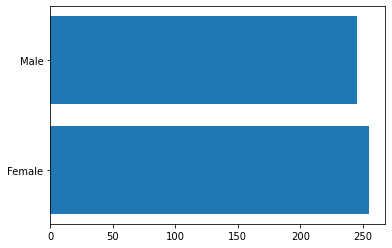

In [26]:
#Vẽ đồ thị thể hiện kết quả 
plt.barh(unique_gender.index, unique_gender.values)

In [27]:
#Thống kê theo cân nặng
unique_weight = df_bmi['Weight_kg'].value_counts()
unique_weight

104    9
80     9
50     9
70     8
141    8
      ..
91     1
55     1
134    1
53     1
112    1
Name: Weight_kg, Length: 110, dtype: int64

In [28]:
type(unique_weight)

pandas.core.series.Series

<BarContainer object of 110 artists>

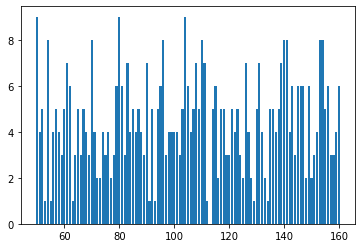

In [29]:
plt.bar(unique_weight.index,unique_weight.values)

# THỰC HÀNH 2:
---
**Yêu cầu 1.1:**
1. Đọc dữ liệu từ file .csv vào biến kiểu dataframe: df_patient với cột feature_1 là cột chỉ số (index_col)
2. Đặt lại tên các cột dữ liệu trong Dataframe: 
    * Feature_1 --> Age
    * Feature_2 --> Gender
    * Feature_3 --> Type
    * Feature_4 --> Blood_pressure
    * Feature_5 --> Cholesterol
    * Feature_6 --> Heartbeat
    * Feature_7 --> Thalassemia
    * Feature_8 --> Result

In [30]:
#{Học viên viết code thực hiện yêu cầu ở đây}
#Khai báo sử dụng thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# đọc dữ liệu từ file
path = 'Data_Excercise\Data_Patient.csv'
df_patient = pd.read_csv(path,index_col=0)
df_patient

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
id,,,,,,,,
Patient_01,63,Male,Typical angina,145,233,150,6.0,0
Patient_02,67,Male,Asymptomatic,160,286,108,3.0,1
Patient_03,67,Male,Asymptomatic,120,229,129,7.0,1
Patient_04,37,Male,Non-anginal pain,130,250,187,3.0,0
Patient_05,41,Female,Atypical angina,130,204,172,NaN,0
...,...,...,...,...,...,...,...,...
Patient_296,59,Male,Asymptomatic,164,176,90,6.0,1
Patient_297,57,Female,Asymptomatic,140,241,123,7.0,1
Patient_298,45,Male,Typical angina,110,264,132,7.0,1


In [33]:
# đặt lại tên cột dữ liệu trong dataframe
df_patient.rename(columns={'feature_1':'Age',
                       'feature_2':'Gender',
                       'feature_3':'Type',
                       'feature_4':'Blood_pressure',
                       'feature_5':'Cholesterol',
                       'feature_6':'Heartbeat',
                       'feature_7':'Thalassemia',
                       'feature_8':'Result'}, inplace=True)
df_patient.head()

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_01,63,Male,Typical angina,145,233,150,6.0,0
Patient_02,67,Male,Asymptomatic,160,286,108,3.0,1
Patient_03,67,Male,Asymptomatic,120,229,129,7.0,1
Patient_04,37,Male,Non-anginal pain,130,250,187,3.0,0
Patient_05,41,Female,Atypical angina,130,204,172,NaN,0


**Yêu cầu 2.2:**
Lọc dữ liệu trong df_patient thành các DataFrame:
    * df_male: chứa danh sách bệnh nhân Nam
    * df_female: chứa danh sách bệnh nhân nữ
    * df_no: danh sách những người không bị bệnh đau tim
    * df_yes: danh sách những người bị bệnh đau tim

In [ ]:
#{Học viên viết code thực hiện yêu cầu ở đây}


In [34]:
#danh sachs giới tính nam
df_male = df_patient[df_patient.Gender=='Male']
df_male

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_01,63,Male,Typical angina,145,233,150,6.0,0
Patient_02,67,Male,Asymptomatic,160,286,108,3.0,1
Patient_03,67,Male,Asymptomatic,120,229,129,7.0,1
Patient_04,37,Male,Non-anginal pain,130,250,187,3.0,0
Patient_06,56,Male,Atypical angina,120,236,178,3.0,0
...,...,...,...,...,...,...,...,...
Patient_295,41,Male,Atypical angina,120,157,182,3.0,0
Patient_296,59,Male,Asymptomatic,164,176,90,6.0,1
Patient_298,45,Male,Typical angina,110,264,132,7.0,1


In [35]:
#danh sách giới tính nữ
df_female = df_patient[df_patient.Gender=='Female']
df_female

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_05,41,Female,Atypical angina,130,204,172,NaN,0
Patient_07,62,Female,Asymptomatic,140,268,160,3.0,1
Patient_08,57,Female,Asymptomatic,120,354,163,3.0,0
Patient_12,56,Female,Atypical angina,140,294,153,3.0,0
Patient_19,48,Female,Non-anginal pain,130,275,139,3.0,0
...,...,...,...,...,...,...,...,...
Patient_282,55,Female,Asymptomatic,128,205,130,7.0,1
Patient_286,58,Female,Asymptomatic,170,225,146,6.0,1
Patient_291,55,Female,Atypical angina,132,342,166,3.0,0


In [37]:
#danh sách người không bị đau tim
df_no = df_patient[df_patient.Result == 0]
df_no

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_01,63,Male,Typical angina,145,233,150,6.0,0
Patient_04,37,Male,Non-anginal pain,130,250,187,3.0,0
Patient_05,41,Female,Atypical angina,130,204,172,NaN,0
Patient_06,56,Male,Atypical angina,120,236,178,3.0,0
Patient_08,57,Female,Asymptomatic,120,354,163,3.0,0
...,...,...,...,...,...,...,...,...
Patient_287,58,Male,Atypical angina,125,220,144,7.0,0
Patient_288,56,Male,Atypical angina,130,221,163,7.0,0
Patient_289,56,Male,Atypical angina,120,240,169,3.0,0


In [38]:
#danh sách người bị đau tim
df_yes = df_patient[df_patient.Result == 1]
df_yes 

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_02,67,Male,Asymptomatic,160,286,108,3.0,1
Patient_03,67,Male,Asymptomatic,120,229,129,7.0,1
Patient_07,62,Female,Asymptomatic,140,268,160,3.0,1
Patient_09,63,Male,Asymptomatic,130,254,147,7.0,1
Patient_10,53,Male,Asymptomatic,140,203,155,7.0,1
...,...,...,...,...,...,...,...,...
Patient_296,59,Male,Asymptomatic,164,176,90,6.0,1
Patient_297,57,Female,Asymptomatic,140,241,123,7.0,1
Patient_298,45,Male,Typical angina,110,264,132,7.0,1


**Yêu cầu 2.3:**
Lọc trong df_patient dưa ra danh sách bệnh nhân thỏa mãn yêu cầu sau:
1. Những người bị mắc bệnh đau tim và trên 70 tuổi
2. Người có giới tính Female, có huyết áp trên 170 mmhg nhưng không bị bệnh đau tim.
3. Những người có triệu chứng đau ngực là Typical angina, giới tính Male và bị bệnh đau tim.

In [ ]:
#{Học viên viết code thực hiện yêu cầu ở đây}



In [39]:
#những người bị mắc bệnh đau tim và trên 70 tuổi
df_p1 = df_patient[(df_patient.Result == 1) & (df_patient.Age > 70)]
df_p1

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_161,77,Male,Asymptomatic,125,304,162,3.0,1


In [43]:
#Người có giới tính Female, có huyết áp trên 170 mmhg nhưng không bị bệnh đau tim.
df_p2 = df_patient[(df_patient.Gender == 'Female') & (df_patient.Blood_pressure > 170) & ~(df_patient.Result == 1)]
df_p2

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_201,64,Female,Asymptomatic,180,325,154,3.0,0


In [ ]:
#Những người có triệu chứng đau ngực là Typical angina, giới tính Male và bị bệnh đau tim.

**Yêu cầu 2.4:** Xác định:
1. Chỉ số huyết áp (Blood_pressure) thấp nhất, cao nhất, trung bình, trung vị và độ lệch chuẩn của tập dữ liệu
2. Chỉ số nhịp tim (Heartbeat) thấp nhất, cao nhất, trung bình, trung vị và độ lệch chuẩn của tập dữ liệu


In [ ]:
#{Học viên viết code thực hiện yêu cầu ở đây}




In [47]:
#Chỉ số huyết áp (Blood_pressure) thấp nhất, cao nhất, trung bình, trung vị và độ lệch chuẩn của tập dữ liệu
df_max = df_patient['Blood_pressure'].max()
df_min = df_patient['Blood_pressure'].min()
df_mean = df_patient['Blood_pressure'].mean()
df_median = df_patient['Blood_pressure'].median()
df_std = df_patient['Blood_pressure'].std()
print('Huyết áp lớn nhất:',df_max)
print('Huyết áp nhỏ nhất:',df_min)
print('Huyết áp trung bình:',df_mean)
print('Huyết áp trung vị:',df_median)
print('Độ lệch chuẩn:',df_std)

Huyết áp lớn nhất: 200
Huyết áp nhỏ nhất: 94
Huyết áp trung bình: 131.68666666666667
Huyết áp trung vị: 130.0
Độ lệch chuẩn: 17.682497692285477


In [48]:
#Chỉ số nhịp tim (Heartbeat) thấp nhất, cao nhất, trung bình, trung vị và độ lệch chuẩn của tập dữ liệu
df_max1 = df_patient['Heartbeat'].max()
df_min1 = df_patient['Heartbeat'].min()
df_mean1 = df_patient['Heartbeat'].mean()
df_median1 = df_patient['Heartbeat'].median()
df_std1 = df_patient['Heartbeat'].std()
print('nhịp tim lớn nhất:',df_max1)
print('nhịp tim nhỏ nhất:',df_min1)
print('nhịp tim trung bình:',df_mean1)
print('nhịp tim trung vị:',df_median1)
print('Độ lệch chuẩn:',df_std1)

nhịp tim lớn nhất: 202
nhịp tim nhỏ nhất: 71
nhịp tim trung bình: 149.56333333333333
nhịp tim trung vị: 152.5
Độ lệch chuẩn: 22.818595118151098


**Yêu cầu 2.5: Xác định:**
1. Số giá trị khác nhau của thuộc tính Type
2. Vẽ đồ thị dạng cột thể hiện kết quả thống kê số lượng theo từng giá trị khác nhau của thuộc tính Type


In [ ]:
#{Học viên viết code thực hiện yêu cầu ở đây}



In [51]:
#Số giá trị khác nhau của thuộc tính Type
unique_1 = df_patient['Type'].value_counts()
unique_1

Asymptomatic        139
Non-anginal pain     84
Atypical angina      49
Typical angina       23
Name: Type, dtype: int64

In [52]:
#Vẽ đồ thị dạng cột thể hiện kết quả thống kê số lượng theo từng giá trị khác nhau của thuộc tính Type
type(unique_1)

pandas.core.series.Series

<BarContainer object of 4 artists>

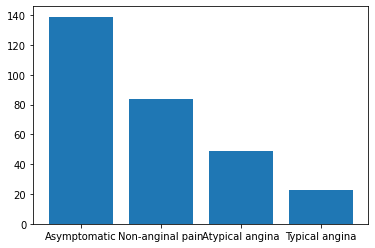

In [53]:
plt.bar(unique_1.index,unique_1.values)